<a href="https://colab.research.google.com/github/TassyaRM/MachineLearning_TK-44-G4_/blob/main/Mgg12/TASSYA_German_Traffic_Sign_Dataset_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TASSYA RAMADHANTI_1103204016**

#**Pengambilan Data Menggunakan API Kaggle**

In [1]:
#Install modul kaggle
!pip install kaggle

In [2]:
from google.colab import files

# Upload file kaggle.json
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tassyaramadhanti","key":"0100ff86eefed89e942ccf669125b605"}'}

In [3]:
# Membuat direktori Kaggle
!mkdir -p ~/.kaggle

# Pindahkan file kaggle.json ke direktori Kaggle
!mv kaggle.json ~/.kaggle/

In [4]:
# Mencari dataset yang tersedia di kaggle
!kaggle datasets list -s "German Traffic Sign Dataset"

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
harbhajansingh21/german-traffic-sign-dataset                       German Traffic Sign Dataset                        118MB  2023-07-11 04:21:24            366         29  1.0              
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11          12727        276  1.0              
valentynsichkar/traffic-signs-dataset-in-yolo-format               Traffic Signs Dataset in YOLO format               250MB  2020-04-03 22:25:16          13694        119  0.9375           
eunjurho/german-traffic-sign-recognition-benchmark

In [5]:
# Download dan ekstrak dataset, dimana nantinya akan satu direktori dengan notebook ini
!kaggle datasets download harbhajansingh21/german-traffic-sign-dataset --unzip

 93% 110M/118M [00:00<00:00, 239MB/s] 
100% 118M/118M [00:00<00:00, 212MB/s]


# **Convolutional Neural Network (CNN)**

In [6]:
# Mengimpor library
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPool2D
from sklearn.model_selection import train_test_split
import pickle
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

Fungsi setiap Library yang diimport adalah:

1. **pandas (pd):** Digunakan untuk manipulasi dan analisis data.

2. **numpy (np):** Merupakan library untuk komputasi numerik.

3. **tensorflow (tf):** Sebuah framework machine learning yang sering digunakan untuk membangun dan melatih model machine learning.

4. **keras.models:** Import modul Sequential dan load_model dari Keras, yang digunakan untuk membuat model neural network secara berurutan (sequential) dan memuat model yang sudah dilatih sebelumnya.

5. **keras.layers:** Import beberapa jenis layer neural network seperti Conv2D, Dense, Flatten, Dropout, dan MaxPool2D. Layer-layer ini digunakan untuk membangun arsitektur model neural network.

6. **sklearn.model_selection:** Mengimport modul train_test_split dari scikit-learn, yang digunakan untuk membagi dataset menjadi subset untuk training dan testing model.

7. **pickle:** Digunakan untuk serialisasi dan deserialisasi objek Python. Biasanya digunakan untuk menyimpan model yang sudah dilatih ke dalam file.

8. **seaborn (sns):** Library untuk membuat visualisasi data yang dibangun di atas Matplotlib. Seaborn menyediakan antarmuka yang lebih tinggi untuk membuat plot yang indah dan informatif.

9. **matplotlib:** Library untuk membuat plot dan visualisasi data.


In [8]:
# Load dataset dengan pickle
training_file = "/content/train.p"
testing_file = "/content/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)

with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

print("Data loaded")

Data loaded


Kode di atas menggunakan Python's `pickle` untuk membaca (deserialisasi) objek dari file. Dua file yang dibaca adalah file pelatihan (`training_file`) dan file pengujian (`testing_file`). Berikut adalah penjelasan singkat dari kode tersebut:

1. `with open(training_file, mode='rb') as f:`: Membuka file `training_file` dalam mode membaca biner (`'rb'`). Ini menjamin bahwa file tersebut dibaca dalam format biner.

2. `train = pickle.load(f)`: Menggunakan `pickle.load` untuk membaca objek dari file yang sudah dibuka sebelumnya. Objek tersebut kemudian disimpan dalam variabel `train`. Proses ini disebut deserialisasi, di mana objek Python yang disimpan dalam format biner diubah kembali menjadi objek yang dapat digunakan dalam program.

dst.

In [9]:
# Load CSV file
sign_name_df = pd.read_csv('/content/signname.csv')
SIGN_NAMES = sign_name_df.SignName.values
sign_name_df.set_index('ClassId', inplace=True)
sign_name_df.head(10)

,SignName
ClassId,
0,Speed limit (20km/h)
1,Speed limit (30km/h)
2,Speed limit (50km/h)
3,Speed limit (60km/h)
4,Speed limit (70km/h)
5,Speed limit (80km/h)
6,End of speed limit (80km/h)
7,Speed limit (100km/h)
8,Speed limit (120km/h)


membaca data dari file CSV ('/content/signname.csv') menggunakan pandas, membuat array SIGN_NAMES dari kolom 'SignName', menetapkan indeks DataFrame ke kolom 'ClassId', dan menampilkan 10 baris pertama dari DataFrame setelah pengaturan indeks

In [10]:
# Displaying Data
matplotlib.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Kode di atas terkait dengan konfigurasi dan pengaturan tampilan visualisasi menggunakan Matplotlib di lingkungan notebook atau console yang mendukung IPython. Berikut penjelasan singkatnya:

1. `matplotlib.style.use('ggplot')`: Mengatur gaya visualisasi menggunakan gaya 'ggplot' dari paket ggplot2 di R. Ini akan mempengaruhi tampilan default dari plot yang dihasilkan oleh Matplotlib, memberikan tampilan yang mirip dengan gaya ggplot.

2. `%matplotlib inline`: Perintah khusus untuk lingkungan IPython (seperti Jupyter Notebook) yang memastikan bahwa plot yang dihasilkan oleh Matplotlib akan ditampilkan langsung di dalam notebook, bukan dalam jendela pop-up terpisah. Ini membuat visualisasi lebih terintegrasi dengan lingkungan notebook.

3. `%config InlineBackend.figure_format = 'retina'`: Pengaturan untuk memberi tahu Matplotlib agar menggunakan format 'retina' untuk gambar. Ini biasanya digunakan pada layar dengan resolusi tinggi, seperti layar Retina pada perangkat Apple. Pengaturan ini meningkatkan kualitas visualisasi pada tampilan tersebut.

In [11]:
# Define features and labels for training data
X, y = train['features'], train['labels']

# Converting lists into numpy arrays
data = np.array(X)
labels = np.array(y)
print(data.shape, labels.shape)

# Define the features and labels for testing data
X_test, y_test = test['features'], test['labels']

# Converting lists into numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)
print(X_test.shape, y_test.shape)

(34799, 32, 32, 3) (34799,)
(12630, 32, 32, 3) (12630,)


In [12]:
X, y = train['features'], train['labels']

In [13]:
data = np.array(X)
labels = np.array(y)
print(data.shape, labels.shape)

(34799, 32, 32, 3) (34799,)


In [14]:
X_test, y_test = test['features'], test['labels']

Mendifinisikan fitur (X_test) dan label (y_test) dari data pengujian.

In [15]:
X_test = np.array(X_test)
y_test = np.array(y_test)
print(X_test.shape, y_test.shape)

(12630, 32, 32, 3) (12630,)


In [16]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=0)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(31319, 32, 32, 3) (3480, 32, 32, 3) (31319,) (3480,)


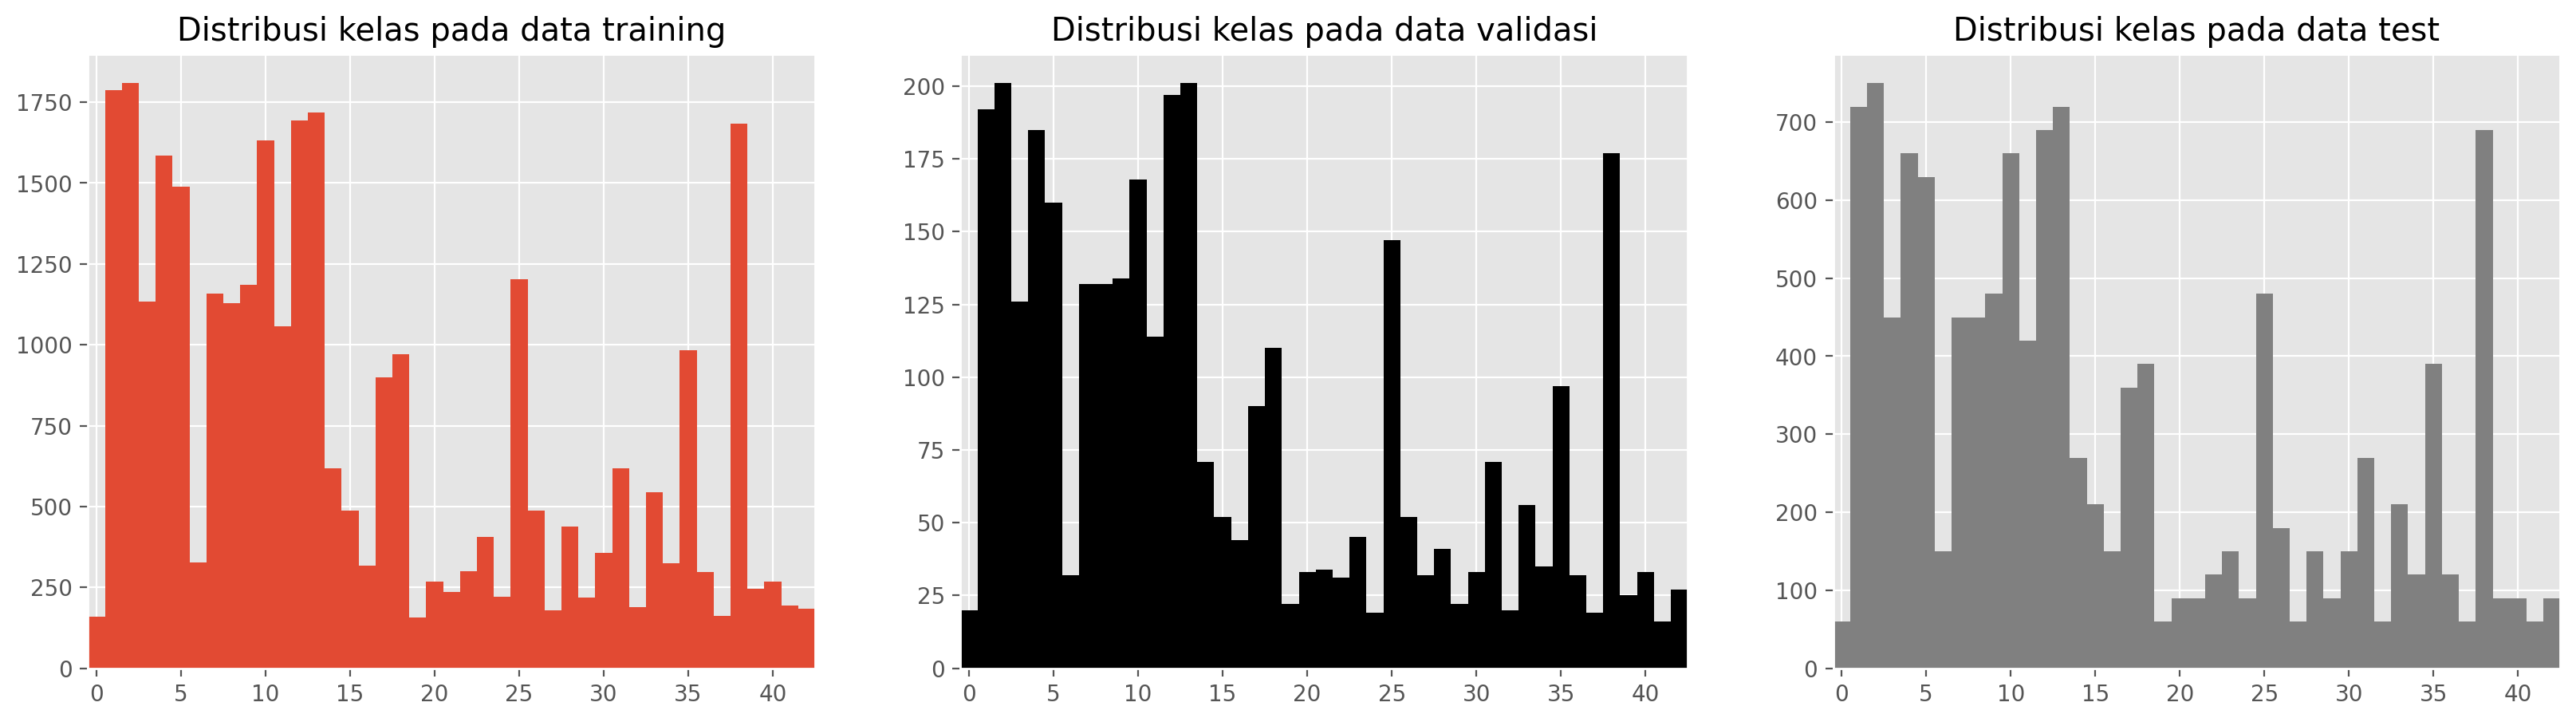

In [17]:
n_labels = np.unique(y_train).size

def hist_data(y_data, title=None, ax=None, **kwargs):
    if not ax:
        fig = plt.figure()
        ax = fig.add_subplot(111)
    ax.hist(y_data, np.arange(-0.5, n_labels+1.5), stacked=True, **kwargs)
    ax.set_xlim(-0.5, n_labels-0.5)
    if 'label' in kwargs:
        ax.legend()
    if title:
        ax.set_title(title)

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
hist_data(y_train, title='Distribusi kelas pada data training', ax=ax[0])
hist_data(y_val, title='Distribusi kelas pada data validasi', ax=ax[1], color='black')
hist_data(y_test, title='Distribusi kelas pada data test', ax=ax[2], color='grey')

Dalam kode tersebut, kita membuat fungsi `hist_data` untuk membuat histogram distribusi kelas dari data. Kemudian, kita menggunakan fungsi ini untuk menggambarkan histogram distribusi kelas pada data pelatihan (`y_train`), validasi (`y_val`), dan pengujian (`y_test`). Berikut adalah penjelasan singkatnya:

1. `n_labels = np.unique(y_train).size`: Menghitung jumlah kelas unik dalam data pelatihan dan menyimpannya dalam variabel `n_labels`. Ini berguna untuk menentukan lebar bin histogram.

2. Fungsi `hist_data`:
   - `y_data` adalah array label yang akan digunakan untuk membuat histogram.
   - `title` adalah judul yang akan ditambahkan ke plot (opsional).
   - `ax` adalah sumbu tempat histogram akan digambar. Jika tidak diberikan, maka fungsi akan membuat subplot baru.
   - `**kwargs` digunakan untuk menerima argumen tambahan yang akan diteruskan ke fungsi `hist`.

3. `ax.hist(y_data, np.arange(-0.5, n_labels+1.5), stacked=True, **kwargs)`: Membuat histogram dari data label `y_data` dengan lebar bin yang telah dihitung sebelumnya. Pengaturan `stacked=True` memungkinkan stacking untuk kelas yang berbeda pada satu bin.

4. `ax.set_xlim(-0.5, n_labels-0.5)`: Mengatur batas sumbu x agar sesuai dengan jumlah kelas.

5. `if 'label' in kwargs: ax.legend()`: Menambahkan legenda jika argumen 'label' diberikan.

6. `if title: ax.set_title(title)`: Menambahkan judul ke subplot jika judul diberikan.

7. `fig, ax = plt.subplots(1, 3, figsize=(20, 5))`: Membuat subplot dengan 1 baris dan 3 kolom untuk menampilkan tiga histogram sekaligus. Ukuran total gambar adalah 20x5.

8. `hist_data(y_train, title='Distribusi kelas pada data training', ax=ax[0])`: Membuat histogram untuk data pelatihan dan menambahkannya ke subplot pertama.

9. `hist_data(y_val, title='Distribusi kelas pada data validasi', ax=ax[1], color='black')`: Membuat histogram untuk data validasi dengan warna hitam dan menambahkannya ke subplot kedua.

10. `hist_data(y_test, title='Distribusi kelas pada data test', ax=ax[2], color='grey')`: Membuat histogram untuk data pengujian dengan warna abu-abu dan menambahkannya ke subplot ketiga.

In [18]:
# Converting Labels into One-Hot Encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical (y_train,43)
y_val = to_categorical(y_val,43)

In [19]:
# callback for Early Stopping
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.96):
            print("\nAkurasi telah mencapai >96%. Stop training!")
            self.model.stop_training = True
callbacks = myCallback()

Mendefinisikan sebuah callback myCallback yang akan dipanggil setiap akhir epoch. jika akurasi pada epoch tersebut melebihi 0,96, pelatihan akan dihentikan.

In [20]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))

Membangun Model Sequential (Berurutan) dengan Lapisan-Lapisan sebagai Berikut:

1. Dua lapisan konvolusi dengan fungsi aktivasi ReLU.
2. Lapisan pengurangan dimensi menggunakan MaxPooling.
3. Lapisan Dropout untuk mengurangi overfitting.
Overfitting adalah masalah dalam pembelajaran mesin di mana model menjadi terlalu cocok dengan data pelatihan dan tidak dapat generalisasi dengan baik ke data baru. Lapisan Dropout adalah teknik yang digunakan untuk mengurangi overfitting dengan menghapus beberapa neuron(node) dari model secara acak selama pelatihan.

4. Lapisan Flatten untuk mengubah output ke dalam bentuk flat sebelum masuk ke lapisan Dense.
Lapisan Flatten mengubah output dari lapisan konvolusi menjadi satu vektor.

5. Dua lapisan Dense (fully connected) dengan fungsi aktivasi ReLU dan Softmax.

In [21]:
# Print Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          36928     
                                                        

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Mengkompilasi model dengan menentukan fungsi kerugian (loss function) sebagai categorical crossentropy (karena ini adalah masalah klasifikasi multikelas), optimizer sebagai 'adam', dan metrik evaluasi sebagai akurasi.

Training model:

In [24]:
epochs = 25
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val), callbacks=[callbacks])

Epoch 1/25
979/979 [==============================] - 165s 167ms/step - loss: 1.8072 - accuracy: 0.5367 - val_loss: 0.5144 - val_accuracy: 0.8345
Epoch 2/25
979/979 [==============================] - 170s 174ms/step - loss: 0.7247 - accuracy: 0.7815 - val_loss: 0.3087 - val_accuracy: 0.9218
Epoch 3/25
979/979 [==============================] - 163s 166ms/step - loss: 0.5309 - accuracy: 0.8379 - val_loss: 0.1756 - val_accuracy: 0.9563
Epoch 4/25
979/979 [==============================] - 153s 157ms/step - loss: 0.4246 - accuracy: 0.8707 - val_loss: 0.1446 - val_accuracy: 0.9569
Epoch 5/25
979/979 [==============================] - 145s 149ms/step - loss: 0.3719 - accuracy: 0.8904 - val_loss: 0.1059 - val_accuracy: 0.9672
Epoch 6/25
979/979 [==============================] - 143s 146ms/step - loss: 0.2935 - accuracy: 0.9105 - val_loss: 0.1096 - val_accuracy: 0.9698
Epoch 7/25
979/979 [==============================] - 155s 158ms/step - loss: 0.2610 - accuracy: 0.9215 - val_loss: 0.1037 -

Melatih model menggunakan data pelatihan (X_train,y_train) dengan batch size sebesar 32, selama 25 epoch. Data validasi (X_val,y_val) juga digunakan untuk memantau kinerja model selama pelatihan. Callback myCallback digunakan untuk menghentikan pelatihan jika akurasi mencapai lebih dari 96%.

In [25]:
model.save("my_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


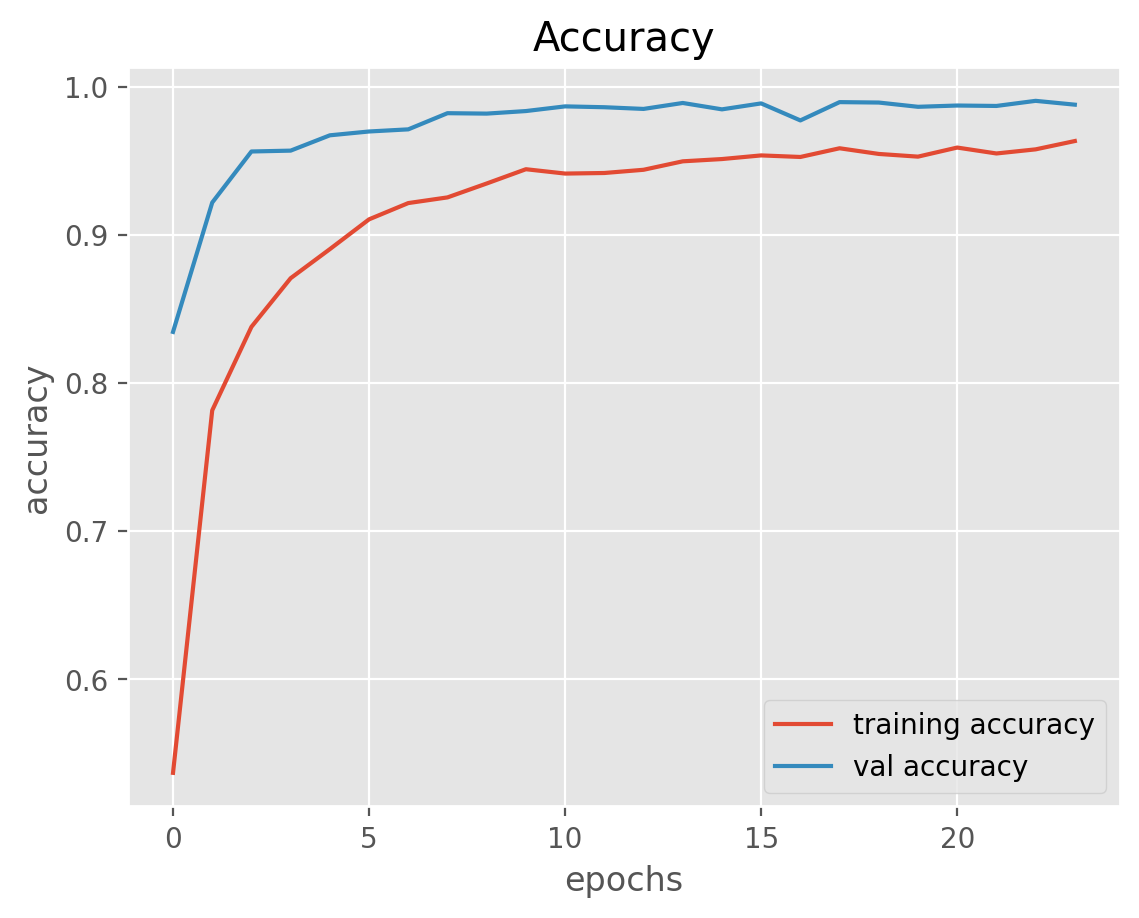

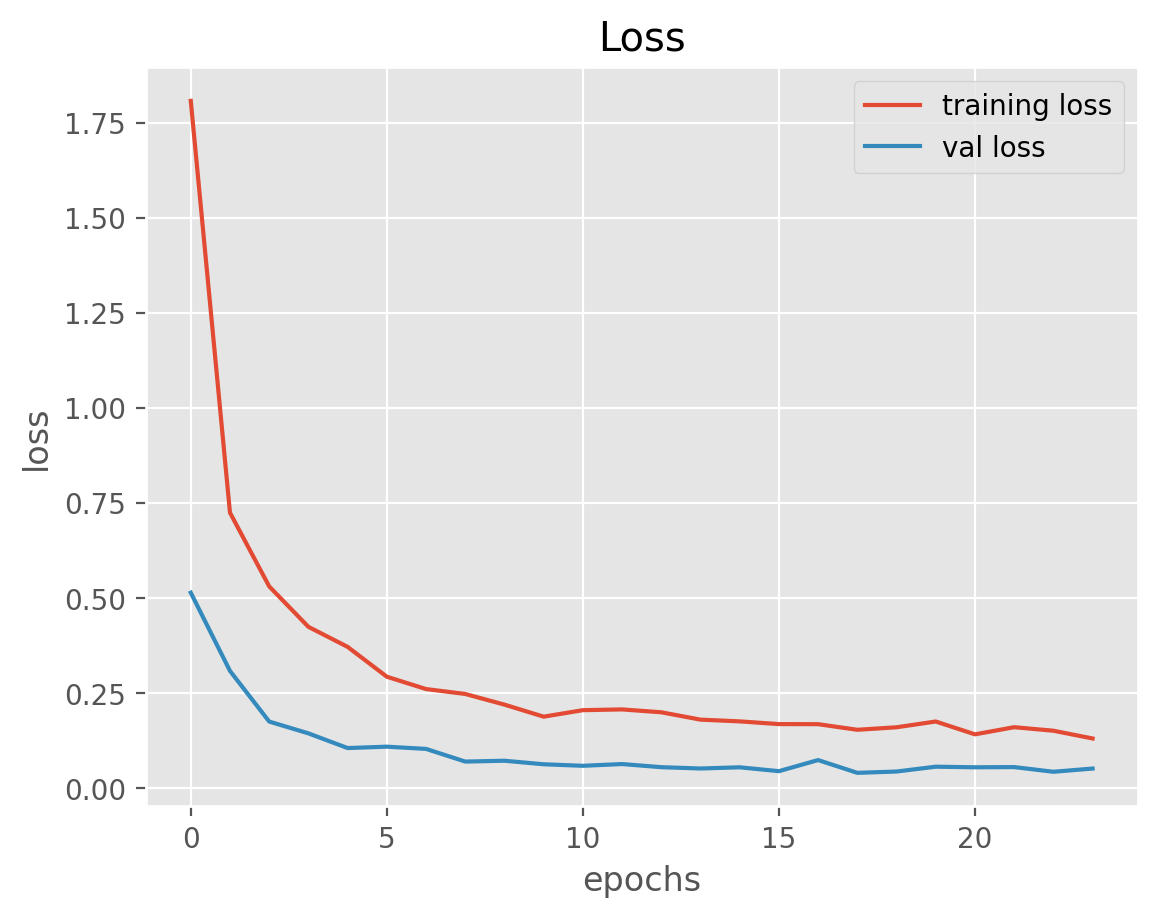

In [26]:
# Plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Plotting graphs for loss
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Membuat dua grafik untuk memvisualisasikan metrik pelatihan dan validasi model (akurasi dan loss) selama proses pelatihan.
Idealnya, kita ingin melihat peningkatan akurasi dan penurunan loss seiring bertambahnya jumlah epoch. Jika terjadi overfitting, grafik akurasi pelatihan mungkin terus meningkat sementara akurasi validasi tidak.

In [27]:
from sklearn.metrics import accuracy_score

pred = np.argmax(model.predict(X_test), axis=-1)
accuracy_score(y_test, pred)

395/395 [==============================] - 16s 40ms/step


0.949089469517023

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        60
           1       0.95      0.99      0.97       720
           2       0.95      0.94      0.95       750
           3       0.88      0.97      0.92       450
           4       0.97      0.96      0.96       660
           5       0.95      0.92      0.93       630
           6       0.98      0.85      0.91       150
           7       0.94      0.99      0.96       450
           8       0.98      0.96      0.97       450
           9       0.97      1.00      0.98       480
          10       0.99      0.99      0.99       660
          11       0.96      0.87      0.91       420
          12       0.98      0.97      0.98       690
          13       0.98      1.00      0.99       720
          14       0.99      1.00      0.99       270
          15       0.97      0.97      0.97       210
          16       0.94      1.00      0.97       150
          17       0.99    

 kita melihat tiga metrik utama: accuracy, macro avg (rata-rata harmonik makro), dan weighted avg (rata-rata harmonik terbobot). Nilai-nilai yang tinggi pada ketiga metrik tersebut menunjukkan bahwa model ini berhasil dalam mengklasifikasikan dataset yang diberikan.